# Hummed and Whistled Song Classification using Machine Learning

# 1 Author

**Student Name:**  Daria Gorbunova

**Student ID**: 231173199



# 2 Problem formulation

## 2.1 Type of problem:
This machine learning problem is a multi-class classification one. The goal is to take a 10-second audio of a hum or a whistle, from the provided dataset, and determine which of the 8 possible song the audio is from. The possible song labels in this problem are:
1. Happy
2. Try Everything
3. Remember Me
4. New York
5. Friend
6. Necessities
7. Feeling
8. Married

Since the input data (audio clip) has a label, this is a supervised learning task.

## 2.2 The dataset:
The dataset MLEnd Hums and Whistles II has been provided by the module team. The dataset was created with student contributions, where each student was tasked to provide:
- 4 humming instances
- 4 whistling instances

per each of the 8 songs outlined above. 

However, some participants could not whistle and were instead given permission to supply 8 humming instances only. This led to uneven numbers of hums vs whistles in the raw collected data. 
After the examination of the subset (800 samples) provided for this mini project, using a file-counting script:
- The dataset has 800 samples.
- The number of instances of hums and whistles is balanced equally. 
- Each of the 8 song classes has 100 instances. 

Therefore, the subset of the dataset released by the teaching team for this task is balanced, which reduces the risk of class imbalance, which is ideal for machine learning models.

## 2.3 Nature of instances:
Each instance of the dataset consists of human-recorded raw waveform audio of differing lengths. Before providing the dataset, the module team applied basic preprocessing to clean the raw submissions. This included trimming of long silences, removing obvious background noise where possible and normalising audio volume.

However, the dataset will still contain substantial real-world variations due to the nature of the recordings, they are affected by factors such as different microphones, different acoustic environments, just to name a few. 

Audio instances are high dimensional, and even 5 second clip samples at 16kHz contain around 80,000 raw waveform values. For this reason, raw audio cannot be used directly with ML models and feature extraction is required, this will be outlined in the methodology section. 

## 2.4 What makes the problem interesting:
- High variability in humming and whistling: people hum and whistle differently, there is varibaility in pitch stability, tempo and rhythm. Even the same person can reproduce the same melody inconsistently. 
- Similarity between some melodies: certain songs in the dataset share similar rhythmic patterns.
- Recording and environemntal noise: audio was captured through the same software, but with different devices, microphones and under different acoustic conditions. Despite preprocessing done by module team, variation remains.
- Complex, high-dimensional input: raw audio is highly dimensional and relationship between raw waveform and melody is higly non-linear, which cannot be learned by classical methods. Featuer extraction is required to represent the instances better.

# 3 Methodology
## 3.1 Overview of methodology
The overall methodology will follow the standard supervised learning pipeline for audio classification. 
- Loading the dataset. 
- Preprocessing raw audio waveform to extract meaningful features.
- Training a range of machine learning models.
- Optimising hyperparameters using the validation data.
- Evaluating final performance on the test set.
- Comparing models to reflect on results across them. 

## 3.2 Audio preprocessing
As mentioned in the problem formulation, raw waveform data is highly dimensional and not very useful for machine learning algorithms. Preprocessing of the data will include:
- Loading audio files using librosa at a fixed sampling rate of 16khz. 
- Normalising amplitude to reduce loudness variation.
- Converting waveforms into 2D time-frequency representations using MFCCs and Mel spectograms. 
- Trimming to make sure all the instances are 10 seconds long, and have a consistent number of frames. 
- Scalling features.

MFCCs will be used for Logistic Regression, KNN and MLP. 

Mel-spectograms will be used for CNNs to preserve spatial patterns required for convolution. 

## 3.3 Data splitting
To ensure correct evaluation of the models, the larger dataset will be divided into:
- Training set, used to fit model
- Validation set, used for hyperparameter turning and model selection.
- Testing set, used at the end to estimate genralisation performance.

A stratified split will be used to maintian balanced class proportion for all 8 songs. The full methodology and implementation of data splitting is outlined in Ssection 5 - Datasets. 

## 3.4 Models considered
A range of models will be implemented to examine how perfromance changes with model complexity. 
### 3.4.1 Logistic Regression
A simple linear classifier, used for baseline to commpare more advanced models against. Logistic regression is fast to train and interpretable. It directly uses flattened extracted features from data preprocessing. 

Not expected to perform well as humming and whistling data is non linear. 
### 3.4.2 k-Nearest Neighbours (KNN)
Non-parametric and memory based model which is easy to implement and useful for examining how the data clusters after feature extraction using MFCC. This model will be sensitive to feature scaling and high-dimensionality, but is expected to have better performance depending on k. 
### 3.4.3 Multi-layer Perceptron (MLP)
Fully connected neural network that can model non linear relationships in the data. Also works from flattened features extracted using MFCC, but has risks of overfitting if hyperparameters are not tuned carefully. 
### 3.4.4 Convolutional Neural Network (CNN)
Deep learning model capable of extracting spatial patterns from 2D representations. Highest expected performance due to ability to learn hierachical features. Not as easy to implement, due to factors such as regularisation, and more computationally expensive with added risk of overffiting on small datasets. 

## 3.5 Performance Metrics
Model performance will be quanitified using:
- Accuracy to determine the percentage of correctly classified test samples.
- Confusion matrix to provide insights into which classes are being misclassified.  

Accuracy, although not always best to evaluate models, is appropriate in this case as this is a balanced multi-class classification task. 

## 3.6 Validation Task
Validation task inloves the selection of the best parameters such as k in KNN and learning rates. Comparing performance across models with these tuned parameters on the validation data. It is also where I will check if the model is overffiting, by monitoring training and validation accuracy, and selecting the model with best performance to take to the testing set.


# 4 Implemented ML prediction pipelines
The main idea of the prediction pipelines in this project is to convert raw audio recordings from the dataset into inputs suitable for machine learning models, mapping these representations to one of the eight song labels. 

The pipeline is a sequence of processing stages, each applying some transformation to the data into a new intermediate representation, which finally leads to a class label. Since I am going to implement 4 models, I have two main pipelines:

- Pipeline A: used by Logistic Regression, k-Nearest Neighbours (kNN) and Multi-Layer Perceptron (MLP)
- Pipeline B: used for Convolutional Neural Network

The need for two pipelines comes from the fact that both share the same loading procedure, but differ in feature extraction stages.

## 4.1 Transformation stage
During this stage raw waveform audio data is converted into meaningful features which can be used for machine learning, as original data is too high-dimensional and unsuitable for the task. All audio files are loaded at a fixed sampling rate and their amplitude is normalised, and finally features are extracted. 
### 4.1.1 Pipeline A
**Input:** audio waveform instances from the dataset
**Transformations:**
- Audio is trimmed to a fixed 10 second duration.
- Mel-Frequency Cepstral Coefficient (MFCCs) are computed.
- MFCC matrix is flattened by averaging across time interval (10 seconds)
- Features are scaled using StandardScaler
**Output:** Fixed-length feature vector suitable for machine learning models 1-3. 

After the transformation is done, MFCC has compressed the signal into a meaningful space while reducing dimensionality, so data can be used in this task. 
MFCC works by converting the audio into short frames and then looking at which frequencies are resent. The frequency spectrum is then compressed using triangular Mel filters. Logarithmic values are taken and most important coefficients are kept using DCT.

Since the result is a vector, this makes it ideal for logistic regression, kNN and MLPs which use vector inputs. 
### 4.1.2 Pipeline B
**Input:** audio waveform instances from the dataset
**Transformations:**
- Audio is trimmed to a fixed 10 second duration.
- Mel-spectogram is generated
- Log scaling is applied to stabilise for variance
- Resulting 2D time-frequency array is normalised
**Output:** 2D array representing a spectogram suitable for a convolution network. 

CNN looks at spatial locality and patterns in the 2D data. Using this method we preserve meaningful time-frequency relationships which are then used by CNN to learns hierarchical audio features which cant be accessed by simpler models. 

## 4.2 Model stage
Eac processed feature representation is passed into a classification model, three of the models use the same input format which are MFCC vectors, and CNN uses a 2D spectogram array.

### 4.2.1 Logistic Regression
**Input:** Flattened MFCC vector

**Output:** Probability distirbution over 8 classes 

Logistic regression acts as a simple model which can be used as a baseline and benchmarking for other models. It is also used to see if features extracted in previous stage contain enough information to be modelled linearly. 

### 4.2.2 k-Nearest Neighbours (kNN)
**Input:** Flattened MFCC vector

**Output:** Predicted class label from majority vote among k closest samples. 

Reveals natural cluster structure in MFCC (feature) space, non parametric baseline. Makes no assumption about the underlying data line Logistic regression did. 

### 4.2.3 Multi-layer Perceptron (MLP)
**Input:** Flattened MFCC vector

**Architecture:** Dense layers with nonlinear activations, ending with a softmax layer

**Output:** Class probabilities 

Can learn non linear relationships between MFCC extracted features without requiring convolution. Unlike Logistic Regression, can model more complex relationships as it can learn non linear transformations, potentially expected to perform better. 

### 4.2.4 Convolutional Neural Network (CNN)
**Input:** 2D mel-spectogram array

**Architecture:** Convolution, activation, pooling, followed by dense layers.

**Output:** Class probabilities

Can capture time-frequency patterns and learn hierarcial representations, best for audio classification out of the three previous models.

## 4.3 Ensemble stage

For my mini project I will not implement an ensemble method. 

Techniques such as bagging, boosting or stacking can improve predicion performance of models as it combines multiple models. I chose to train multiple deep learning and classical models instead, as outlined above. 

The aim of my project is to compare individual model families like linear models, instance-based models, neural networks and convolutional networks. Implementing an ensemble stage on top of this would make it harder to evaluate the model families independently. 

Therefore, the model stage includes four models and pipelines that are described above and the ensemble stage is intentionally left out.

# 5 Dataset
## 5.1 Overview of dataset construction
All datasets that I will create in this section are derived from the MLEnd Hums and Whistles II dataset. For this project, the 800-sample version is used exclusively. The reason for this is because 800-sample dataset fully contains all samples from the 400 one, and more on top. Using the bigger dataset provides a larger, more diverse set of recordings, which is importants for training machine learning models. 

The original dataset has 800 audio recordings, each is either a hum or a whistle of one of eight song classes. Each file is labelled under the same convention that encodes both the song and whether the recording is a hum or a whistle. 

The goal of this section is to build the training, validation and testing datasets which will be used in the training and evaluation of models in this project. 

All raw audio files will be loaded, labelled, preprocessed and then split into subsets for training, validation and testing. 

Original dataset is balanced across the eight classes (100 instances per class).

## 5.2 Ensuring IID, balance, independence
- To ensure fair evaluation across all models all the files will first be shuffled. 
- Strattified sampling will then be used so that each class maintains equal representation in training, validationa and testing sets. 
- The splits are all mutually exclusive, meaning no audio clip appears in more than one dataset. 
- Instances are treated as independent and identically treated as each one is a separate human performance, there is not dependence between them, and metadata indicates unique recording per file. 

The split of data between the three parts for each dataset are:
- 70% training
- 15% validation
- 15% testing

Logistic Regression, kNN and MLP will be trained on training set of Dataset A. NLP parameters will be fine tuned on validation set of Database A. And all three models' performances will be evaluated on Dataset A's testing data. 

CNN will be trained on Dataset B's training data, fine-tuned with Dataset B's validation data and performance evaluated on Dataset B's testing data. 

## 5.3 Dataset A (MFCC-based)
This follows Transformation stage of Pipeline A and is designed for classical ML models: Logistic Regression, k-Nearest Neighbours and MLP.

Each audio file:
1. Is loaded as waveform at a fixed sampling rate of 16kHz.
2. Trimmed to a consistent duration fo 10 seconds. 
3. Normalised for amplitude. 
4. Compute MFCC features. 
5. MFCC time series is collapsed by averaging across time to form fixed length feature vector. 
6. Features are scaled using StandardScaler. 

The following NumPy arrays are created and stored:

- X_train_mfcc.npy, X_val_mfcc.npy, X_test_mfcc.npy (1-D feature vectors)
- y_train.npy, y_val.npy, y_test.npy (corresponsing integer labels, shared with Dataset B)




In [7]:
# imports 
import os
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

DATA_DIR = "../data/MLEndHWII_Sample_800" # original dataset path
SAMPLE_RATE = 16000 # 16 kHz
DURATION = 10  # 10 seconds
FIXED_LENGTH = SAMPLE_RATE * DURATION  

# loading filenames and sorting
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".wav")]
files.sort()

print("Number of audio files:", len(files))

# file name format exmaple: S1_hum_2_Necessities.wav
# file name format :        {sample_num}_{hum/whistle}_{class_label}.wav
# extracting class labels from file names

def extract_label(filename):
    components = filename.split("_") # split by underscore  
    end = components[-1].split(".") # split last part by dot {class_label}.wav
    class_label = end[0]  # get class label
    return class_label

labels = np.array([extract_label(f) for f in files])

# sorting and converting label classes to integers for classification
unique = sorted(list(set(labels)))
label_to_int = {label: i for i, label in enumerate(unique)}
y = np.array([label_to_int[l] for l in labels])

print("Unique classes found:", unique) # checking all class names exist

X_mfcc = [] # list to hold MFCC feature vectors

# loading audio files, padding/trimming to fixed length, computing MFCCs
for f in files:
    path = os.path.join(DATA_DIR, f)

    # load audio using librosa
    audio, sr = librosa.load(path, sr=SAMPLE_RATE)

    # pad/trim to fixed length
    if len(audio) > FIXED_LENGTH:
        audio = audio[:FIXED_LENGTH]
    else:
        audio = np.pad(audio, (0, FIXED_LENGTH - len(audio)))

    # compute MFCC features and collapse to 1D vector
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40) # 40 coefficients
    mfcc_mean = mfcc.mean(axis=1)

    X_mfcc.append(mfcc_mean)

X_mfcc = np.array(X_mfcc) # the whole dataset as numpy array of feature vectors
print("MFCC dataset shape:", X_mfcc.shape) 


# stratified splitting to maintain class distribution 
# 70% train, 15% val, 15% test
# first split into train 70% and temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(X_mfcc, y, test_size=0.30, random_state=42, stratify=y)

# then split temp into val 15% and test 15%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train size:", X_train.shape)
print("Val size:", X_val.shape)
print("Test size:", X_test.shape)


# standard scaling on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# saving processed datasets
os.makedirs("../data/processed", exist_ok=True)

np.save("../data/processed/X_train_mfcc.npy", X_train_scaled)
np.save("../data/processed/X_val_mfcc.npy", X_val_scaled)
np.save("../data/processed/X_test_mfcc.npy", X_test_scaled)

np.save("../data/processed/y_train.npy", y_train)
np.save("../data/processed/y_val.npy", y_val)
np.save("../data/processed/y_test.npy", y_test)

print("Saved MFCC datasets in data/processed/")


Number of audio files: 800
Unique classes found: [np.str_('Feeling'), np.str_('Friend'), np.str_('Happy'), np.str_('Married'), np.str_('Necessities'), np.str_('NewYork'), np.str_('RememberMe'), np.str_('TryEverything')]
MFCC dataset shape: (800, 40)
Train size: (560, 40)
Val size: (120, 40)
Test size: (120, 40)
Saved MFCC datasets in data/processed/


## 5.4 Dataset B (Spectogram-based)
This follows Transformation stage of Pipeline B and is designed for CNN use only, which requires 2D structured inputs. 

Each audio file:
1. Is loaded as waveform at a fixed sampling rate of 16kHz. 
2. Normalised for amplitude. 
3. Generates Mel-spectogram using short-time Fourier transform followed by Mel filterbanks. 
4. Log-scaled to stabilise variance.
5. Resized to consistent shapes (equivalent of trimming to 10 seconds for Pipeline A, for consistency)
6. Normalised.

The following NumPy arrays are created and stored:

- X_train_spec.npy, X_val_spec.npy, X_test_spec.npy (2D feature matrix)
- y_train.npy, y_val.npy, y_test.npy (corresponsing integer labels, shared with Dataset A)
 


In [8]:
# imports 
import os
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

DATA_DIR = "../data/MLEndHWII_Sample_800" # original dataset path
SAMPLE_RATE = 16000 # 16 kHz
DURATION = 10  # 10 seconds
FIXED_LENGTH = SAMPLE_RATE * DURATION  

# loading filenames and sorting
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".wav")]
files.sort()

print("Number of audio files:", len(files))

# file name format exmaple: S1_hum_2_Necessities.wav
# file name format :        {sample_num}_{hum/whistle}_{class_label}.wav
# extracting class labels from file names

def extract_label(filename):
    components = filename.split("_") # split by underscore  
    end = components[-1].split(".") # split last part by dot {class_label}.wav
    class_label = end[0]  # get class label
    return class_label

labels = np.array([extract_label(f) for f in files])

# sorting and converting label classes to integers for classification
unique = sorted(list(set(labels)))
label_to_int = {label: i for i, label in enumerate(unique)}
y = np.array([label_to_int[l] for l in labels])

print("Unique classes found:", unique) # checking all class names exist

# spectogram dataset
X_spec = []

# spectrogram parameters
N_MELS = 64          # number of Mel filters
HOP_LENGTH = 512     # controls time resolution
FMIN = 20
FMAX = SAMPLE_RATE // 2

for f in files:
    path = os.path.join(DATA_DIR, f)

    # load audio using librosa
    audio, sr = librosa.load(path, sr=SAMPLE_RATE)

    # pad/trim to fixed length
    if len(audio) > FIXED_LENGTH:
        audio = audio[:FIXED_LENGTH]
    else:
        audio = np.pad(audio, (0, FIXED_LENGTH - len(audio)))

    # compute mel-spectrogram
    mel = librosa.feature.melspectrogram(
        y=audio,
        sr=SAMPLE_RATE,
        n_mels=N_MELS,
        fmin=FMIN,
        fmax=FMAX,
        hop_length=HOP_LENGTH
    )

    # convert to log scale
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # normalise spectrogram
    mel_norm = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-6)

    X_spec.append(mel_norm)

X_spec = np.array(X_spec)

print("Spectrogram dataset shape:", X_spec.shape)  
# expected shape: (800, 64, ~310) depending on hop size

# stratified splitting to maintain class distribution 
# 70% train, 15% val, 15% test
# first split into train 70% and temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(
    X_spec, y, test_size=0.30, random_state=42, stratify=y
)

# then split temp into val 15% and test 15%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)


# saving processed datasets
os.makedirs("../data/processed", exist_ok=True)

np.save("../data/processed/X_train_spec.npy", X_train)
np.save("../data/processed/X_val_spec.npy", X_val)
np.save("../data/processed/X_test_spec.npy", X_test)

np.save("../data/processed/y_train.npy", y_train)
np.save("../data/processed/y_val.npy", y_val)
np.save("../data/processed/y_test.npy", y_test)

print("Saved spectrogram datasets in data/processed/")

Number of audio files: 800
Unique classes found: [np.str_('Feeling'), np.str_('Friend'), np.str_('Happy'), np.str_('Married'), np.str_('Necessities'), np.str_('NewYork'), np.str_('RememberMe'), np.str_('TryEverything')]
Spectrogram dataset shape: (800, 64, 313)
Train: (560, 64, 313)
Val:   (120, 64, 313)
Test:  (120, 64, 313)
Saved spectrogram datasets in data/processed/


## 5.5 Exploratory analysis
Now that I have created training, validation and testing splits for both datasets A and B, before training any machine learning models, it is important to verify they have been created correctly. The sizes (number of samples) should be as follows:
- Training 800 x 0.7 = 560
- Validation 800 x 0.15 = 120
- Testing  800 x 0.15 = 120

The goal of this section is not to perform full data exploration, but to carry out sanity checks that confirm the datasets are usable, consistent and suitable for training and evaluation stages with the models. 

These checks endure preprocessing pipeline worked as intented and that no issues such as corrupted samples, missing value or unexpected class balance have arisen. 


1. I will start by verifying the shapes of the MFFc and spectogram feature arrays, confirming that the tran/validation/test splits all contain the expected number of samples.
2. I will also check for any missing values or invalid values after preprocessing occured and arrays were saved. 
3. Additionally, I include simple visualisations of an example MFCC vector and an example Mel spectrogram to confirm that the extracted features have the expected structure.

### 5.5.1 Loading saved Dataset A and B and checking their shapes

In [12]:
import numpy as np

# load dataset A
X_train_mfcc = np.load("../data/processed/X_train_mfcc.npy")
X_val_mfcc   = np.load("../data/processed/X_val_mfcc.npy")
X_test_mfcc  = np.load("../data/processed/X_test_mfcc.npy")

print("Dataset A:")
print("X_train_mfcc:", X_train_mfcc.shape)
print("X_val_mfcc:  ", X_val_mfcc.shape)
print("X_test_mfcc: ", X_test_mfcc.shape)


# load dataset B
X_train_spec = np.load("../data/processed/X_train_spec.npy")
X_val_spec   = np.load("../data/processed/X_val_spec.npy")
X_test_spec  = np.load("../data/processed/X_test_spec.npy")

print("\nDataset B:")
print("X_train_spec:", X_train_spec.shape)
print("X_val_spec:  ", X_val_spec.shape)
print("X_test_spec: ", X_test_spec.shape)

# loading labels
y_train = np.load("../data/processed/y_train.npy")
y_val   = np.load("../data/processed/y_val.npy")
y_test  = np.load("../data/processed/y_test.npy")

print("\nLabels:")
print("y_train:", y_train.shape)
print("y_val:  ", y_val.shape)
print("y_test: ", y_test.shape)

print("\nData loaded successfully.")

Dataset A:
X_train_mfcc: (560, 40)
X_val_mfcc:   (120, 40)
X_test_mfcc:  (120, 40)

Dataset B:
X_train_spec: (560, 64, 313)
X_val_spec:   (120, 64, 313)
X_test_spec:  (120, 64, 313)

Labels:
y_train: (560,)
y_val:   (120,)
y_test:  (120,)

Data loaded successfully.


#### Findings:
The output confirms that both Dataset A and B were created correctly and can be loaded in from their saves. 

For Dataset A:

Each sample is represented as a 40-dimensional MFCC vector, so the shapes with the splits outlined above should be:
- (560, 40) for training
- (120, 40) for validation
- (120, 40) for testing 
This is consistent with the outputs.


For Dataset B:

Each sample is 2D mel-spectogram. The parameters applied at preprocessing were freq_bins=64, time_frames=313, so the shapes with the splits outlined above should be:
- (560, 64, 313) for training
- (120, 64, 313) for validation
- (120, 64, 313) for testing 
This is consistent with the outputs.

The preprocessing pipeline executed correctly. Dataset A and B both contain the expected number of samples. The splits are consistent and ready for further analysis and model training.

### 5.5.2 Checking for missing or corrupted values

In [22]:
import numpy as np

# check NaNs, infs
def check(name, X, y):
    print(f"\n{name} Shape: {X.shape}")

    # NaNs
    print("NaNs in X:", np.isnan(X).sum())
    print("NaNs in y:", np.isnan(y).sum())
  
    # infs
    print("Infs in X:", np.isinf(X).sum())


# Dataset A 
X_train_mfcc = np.load("../data/processed/X_train_mfcc.npy")
X_val_mfcc   = np.load("../data/processed/X_val_mfcc.npy")
X_test_mfcc  = np.load("../data/processed/X_test_mfcc.npy")

y_train = np.load("../data/processed/y_train.npy")
y_val   = np.load("../data/processed/y_val.npy")
y_test  = np.load("../data/processed/y_test.npy")

check("Dataset A - Train", X_train_mfcc, y_train)
check("Dataset A - Val",   X_val_mfcc,   y_val)
check("Dataset A - Test",  X_test_mfcc,  y_test)

# Dataset B 
X_train_spec = np.load("../data/processed/X_train_spec.npy")
X_val_spec   = np.load("../data/processed/X_val_spec.npy")
X_test_spec  = np.load("../data/processed/X_test_spec.npy")

# labels are shared with dataset A
check("Dataset B - Train", X_train_spec, y_train)
check("Dataset B - Val",   X_val_spec,   y_val)
check("Dataset B - Test",  X_test_spec,  y_test)



Dataset A - Train Shape: (560, 40)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset A - Val Shape: (120, 40)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset A - Test Shape: (120, 40)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset B - Train Shape: (560, 64, 313)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset B - Val Shape: (120, 64, 313)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset B - Test Shape: (120, 64, 313)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0


#### Findings
This step checks whether Dataset A and Dataset B contain any missing or infitnite values. 

The printed output shows:
- Number of NaN values
- Number of inf values

If all results return 0, the datasets are clean and ready for model training, which they are. 

### 5.5.3 MFCC visualisation:

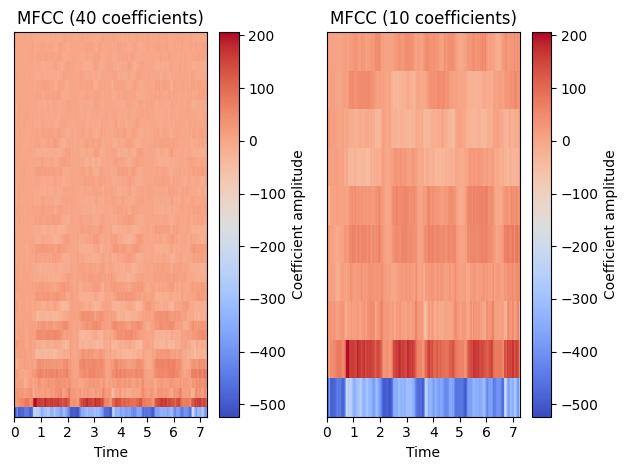

In [30]:
# mfcc visualisation
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# choose any file from dataset A
sample_file = "../data/MLEndHWII_Sample_800/" + os.listdir("../data/MLEndHWII_Sample_800")[0]

# load audio
audio, sr = librosa.load(sample_file, sr=16000)

# trim/pad to 10s (same as pipeline)
FIXED_LENGTH = 16000 * 10
if len(audio) > FIXED_LENGTH:
    audio = audio[:FIXED_LENGTH]
else:
    audio = np.pad(audio, (0, FIXED_LENGTH - len(audio)))

# compute MFCCs with different coefficients
mfcc1 = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
mfcc2 = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=10)

# MFCC with 40 coefficients
plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc1, x_axis='time')
plt.title('MFCC (40 coefficients)')
plt.colorbar(label='Coefficient amplitude')

# MFCC with 10 coefficients
plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc2, x_axis='time')
plt.title('MFCC (10 coefficients)')
plt.colorbar(label='Coefficient amplitude')

plt.tight_layout()
plt.show()


#### Findings:
The generated heat maps visualisation compares MFCC extracted with 40 coefficients (Dataset A) versus 10 coefficients, showing how the number of coefficients affect the richness of the representation:
- 40 coefficient MFCC captures higher level of details. THe heatmap is more detailed and textured, indicating a higher-dimensional represetation.
- 10 coefficients MFCCs capture only broad spectral details. Much smoother representation, details are lost. Still preserves overall pitch countour but not detailed. 

This shows that having more coefficients leads to higher dimensionality, but richer representation, which is why 40 coefficients was the go to for this project, it is expressive enough to capture features in the data for Logistic Regression, kNN and MLP, whilst still keeping the dimensionality reasonble. 

### 5.5.4 Visualising Spectogram

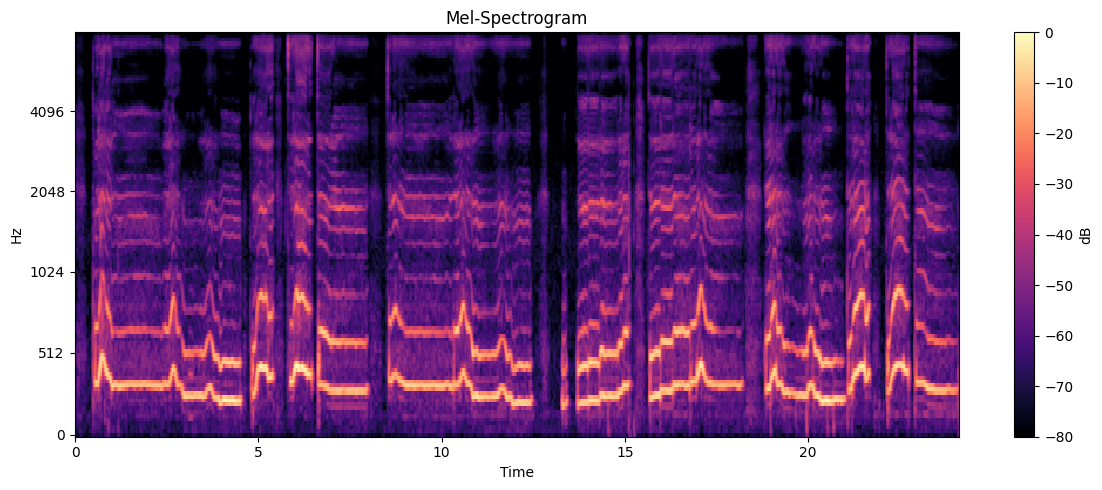

In [33]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# dataset raw directory
DATA_DIR = "../data/MLEndHWII_Sample_800"
files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith(".wav")])

# load first file for visualisation
sample_file = os.path.join(DATA_DIR, files[0])
audio, sr = librosa.load(sample_file, sr=16000)

# compute mel-spectrogram
spectrogram = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=128,
    fmax=8000
)

visual = librosa.power_to_db(spectrogram, ref=np.max)

# plot 
plt.figure(figsize=(12, 5))
librosa.display.specshow(visual, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(label="dB")
plt.title("Mel-Spectrogram")
plt.tight_layout()
plt.show()


#### Findings:
The visualisation shows the expected time frequency structure of a humming or whistling signal. The orange signals represent strong harmonic content which is likely to be humming. The repeated curved pattern shows melodic pattern, representing a consistent tune. The darker regions are periods of silence. 

This visual shows the full duration of the random file, the structure is correct and confirms that the data contains clearn patterns which can be used in the CNN model. The model will look at this and examine temporal progression and harmonic structure, which is not present in MFCC visualisation, hence why classical models are expected to perfrom worse. 

### 5.5.5 Conluding the exploration 
The exploratory checks confirm that both Dataset A and Dataset B were processed correctly and all samples share consistent shapes, no missing values are present, and the class distributions are perfectly balanced across all splits as intended. 

The example MFCC and spectrogram visualisations also indicate that the feature extraction stages behaved correctly. With these verifications completed, the datasets can be used confidently for the training, validation, and testing of the models.

## 5.6 Limitations
Despite being balanced and cleaned, the dataset still has limitations, such as:
- Variation in length, which leads to information loss when trimming
- Different recording equipment and environemnts create variability. 
- Small dataset size (100 per class) likely will limit model generalisation. 
- Similarity between classes as certain melodies may confuse simpler models.

# 6 Experiments and Results

## 6.1 Overview of Experiments
The goal of these experiments is to implement and evaluate four different machine learning models on the task of classifying hummed or whistled audio into one of eight possible song classes. 

Each model is trained using the datasets created in Section 5 - Datasets.
- Dataset A: Logistic Regression, kNN, MLP
- Dataset B: CNN

For every model, training is performed on the training split, hyperparameters are selected using validation split and final performance is reported only on the test split to ensure unabiased evaluation. 

The quality of each model is assessed using accuracu and confused matrices, and the results are analysed, with strengths and weaknesses identified. The following subsections present the experiments, results and interpretation for each model. 

## 6.2 Logistic Regression
### 6.2.1 Training

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load Dataset A 
X_train = np.load("../data/processed/X_train_mfcc.npy")
X_val   = np.load("../data/processed/X_val_mfcc.npy")
X_test  = np.load("../data/processed/X_test_mfcc.npy")

y_train = np.load("../data/processed/y_train.npy")
y_val   = np.load("../data/processed/y_val.npy")
y_test  = np.load("../data/processed/y_test.npy")

# fitting model
log_reg = LogisticRegression(multi_class="multinomial",max_iter=1000,solver="lbfgs")
log_reg.fit(X_train, y_train)
print("Training complete.")


Training complete.


/Users/dashag/Desktop/Principles of Machine Learning/ECS7020P_miniproject/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### 6.2.2 Validation Results

Validation accuracy: 0.1417


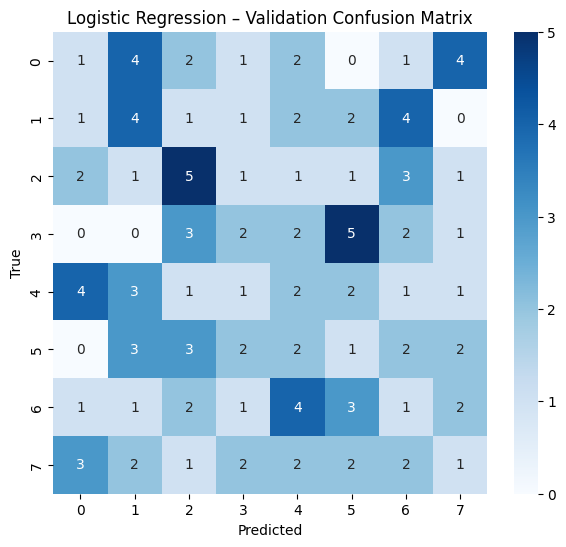

In [43]:
# predict on validation data
val_pred = log_reg.predict(X_val)

val_acc = accuracy_score(y_val, val_pred)
print("Validation accuracy:", round(val_acc, 4))

# validation confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_val, val_pred),
            annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression – Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### 6.2.3 Test Results


Test accuracy: 0.2333


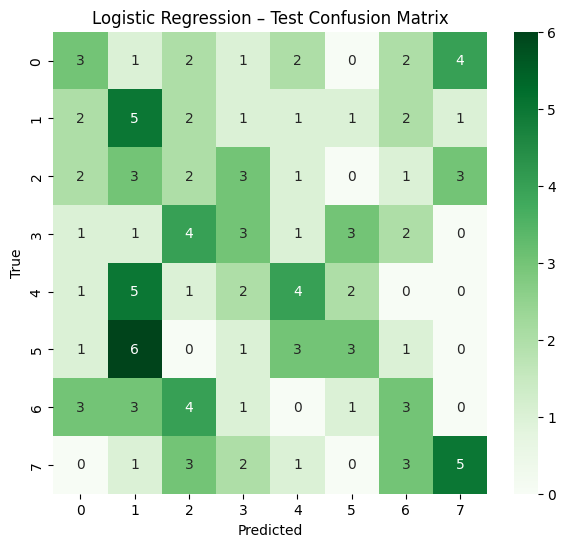

Saved logistic regression model.


In [68]:
import joblib
# predict on test data
test_pred = log_reg.predict(X_test)

test_acc = accuracy_score(y_test, test_pred)
print("Test accuracy:", round(test_acc, 4))

# test confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, test_pred),
            annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression – Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


os.makedirs("../models", exist_ok=True)

joblib.dump(log_reg, "../models/logistic_regression_model.pkl")
print("Saved logistic regression model.")


### 6.2.4 Discussion

The logistic regression model performs poorly on this task, with validation accuracy of 14.17% and test accuracy of 23.33%, only slightly above random chance (12.5% for 8 classes).

Logistic Regression receives only a 40-dimensional averaged MFCC vector which removes melody countour, pitch rpogression and rhythm structure. These are very important to make classification accurate as songs with similar patterns become difficult to distinguished with dimensionality reduced. 

Logistic regression is linear, it cannot cover these relationships once features are collapsed. MFCC and songs are highly nonlinear and highly variational data as I've already explained. Linear decisionboundaries therefore cannot separate such complex variations. 

From the heatmaps it is clear that no class has a strong diagonal cluster and many casses scatter predictions across up to 6 incorrect labels. Some classes like Feeling, Friend, Married seem mutually confused. The suggests that the overlap in MFCC feature space is severe. 

Testing accuracy is higher than validation accuracy, but both are very low. This proves that Logistic Regression acting as a baseline model using simple linear relationship with time-averaged MFCCs is insufficient for melody classification from humming and whistling. This justifies the need for nonlinear models, distance based models and spatial models which are coming up next. 



## 6.3 k-Nearest Neighbours (kNN)
### 6.3.1 Training & Validation


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# load Dataset A 
X_train = np.load("../data/processed/X_train_mfcc.npy")
X_val   = np.load("../data/processed/X_val_mfcc.npy")
X_test  = np.load("../data/processed/X_test_mfcc.npy")

y_train = np.load("../data/processed/y_train.npy")
y_val   = np.load("../data/processed/y_val.npy")
y_test  = np.load("../data/processed/y_test.npy")

# train kNN, validate to choose best k (tuning hyperparameter on validation data)
k_values = [1, 3, 5, 7, 11, 15]
val_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_mfcc, y_train)
    preds = model.predict(X_val_mfcc)
    acc = accuracy_score(y_val, preds)
    val_scores.append(acc)
    print(f"k = {k}, validation accuracy = {acc:.4f}")

# choose best k
best_k = k_values[val_scores.index(max(val_scores))]
print("Best k:", best_k)


k = 1, validation accuracy = 0.1083
k = 3, validation accuracy = 0.1333
k = 5, validation accuracy = 0.1500
k = 7, validation accuracy = 0.1417
k = 11, validation accuracy = 0.2083
k = 15, validation accuracy = 0.2083
Best k: 11


### 6.3.2 Validation results

Validation accuracy (k=11): 0.2083


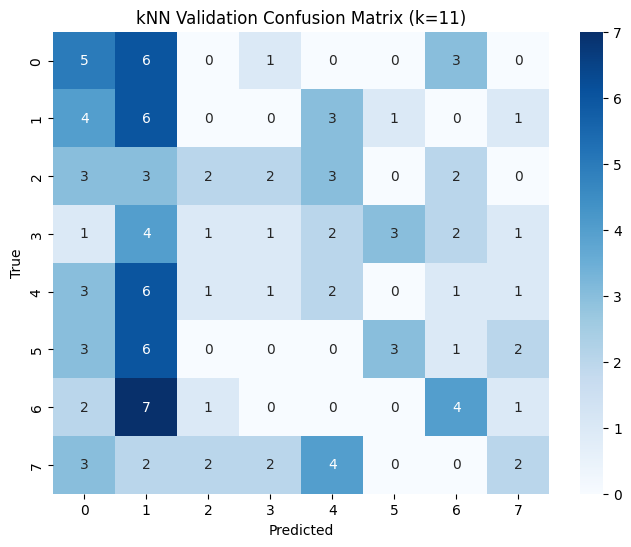

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# validation confusion matrix using best k
best_knn_val = KNeighborsClassifier(n_neighbors=best_k)
best_knn_val.fit(X_train_mfcc, y_train)

val_preds = best_knn_val.predict(X_val_mfcc)
cm_val = confusion_matrix(y_val, val_preds)
acc = accuracy_score(y_val, val_preds)
print(f"Validation accuracy (k={best_k}): {acc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, cmap="Blues", fmt="g")
plt.title(f"kNN Validation Confusion Matrix (k={best_k})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### 6.3.2 Test Results


Test accuracy (k=11): 0.2167


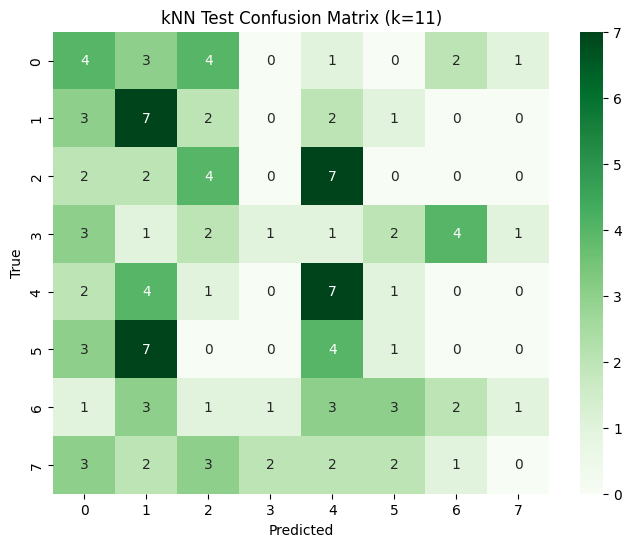

Saved kNN model (best k).


In [73]:
# final model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_mfcc, y_train)

test_preds = best_knn.predict(X_test_mfcc)
test_acc = accuracy_score(y_test, test_preds)
print(f"Test accuracy (k={best_k}):", f"{test_acc:.4f}")

# test confusion matrix
cm_test = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Greens", fmt="g")
plt.title(f"kNN Test Confusion Matrix (k={best_k})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


joblib.dump(best_knn, "../models/knn_model.pkl")
print("Saved kNN model (best k).")

### 6.3.3 Discussion
The kNN model performs noticeably better than Logistic Regression yet its overall accuracy on both validation and testing data is still very low. Validation results across different k values show that very small values of k, such as 1-5, lead to poor performance, suggesting the MFCC space is noisy and highly overlapping across classes. Increasing k improves the devision bounary and performance increases steadily getting to best k = 11, where accurary peaks at 0.2083. The broader neighbourhood around each sample at k = 11 benefits the performance. 

Validation adn testing sets confusion matrices both reveal a similar pattern, predicions cluster heavily around dominant classes and others are consistently misclassified, implying once again that with MFCC many classes still share similar sharacteristics in the feature space, causing them to be misclassified. 

The test accuracy of 0.2167 confirms that the tuned hyperparameter generalises but still indicates huge overlap across classes. kNN relies on geometric structure and cannot learn boundaries well. The model also suffers from high-dimensionality of 40 coefficient vectors, making euclidian distances used in kNN less meaningful. 

Overall, this model improves on previous by leveraging local strucutre, but the features are too compressed and too overlapping for kNN to perform well, implying once again that classical models have limited ability to classify in this task and more expressive models such as MLP and CNNs are required. 

## 6.4 Multi-Layer Perceptron (MLP)
### 6.4.1 Training & Validation

In [130]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# load Dataset A
X_train = np.load("../data/processed/X_train_mfcc.npy")
X_val   = np.load("../data/processed/X_val_mfcc.npy")
X_test  = np.load("../data/processed/X_test_mfcc.npy")

y_train = np.load("../data/processed/y_train.npy")
y_val   = np.load("../data/processed/y_val.npy")
y_test  = np.load("../data/processed/y_test.npy")

# -----------------------------
# 6.3.1 Hyperparameter tuning (hidden layer sizes)
# -----------------------------
architectures = [
    (64, ),
    (128, 64),
    (512, 128),
]

val_scores = []
mlp_models = []

print("MLP Validation Results:\n")

for a in architectures:
    mlp = MLPClassifier(
        hidden_layer_sizes=a,
        activation='relu',
        solver='adam',
        max_iter=200,
        random_state=42,
        learning_rate_init=0.0001,
    )
    
    mlp.fit(X_train, y_train)
    loss_curve = mlp.loss_curve_
    preds = mlp.predict(X_val)
    acc = accuracy_score(y_val, preds)
    
    val_scores.append(acc)
    mlp_models.append(mlp)
    
    print(f"Architecture {a}: Validation accuracy = {acc:.4f}")

# best architecture
best_idx = np.argmax(val_scores)
best_arch = architectures[best_idx]
best_mlp = mlp_models[best_idx]

print("\nBest architecture:", best_arch)
print("Best validation accuracy:", f"{val_scores[best_idx]:.4f}")

MLP Validation Results:

Architecture (64,): Validation accuracy = 0.1500
Architecture (128, 64): Validation accuracy = 0.1583
Architecture (512, 128): Validation accuracy = 0.2000

Best architecture: (512, 128)
Best validation accuracy: 0.2000


### 6.4.2 Validation Results


Validation accuracy: 0.2000


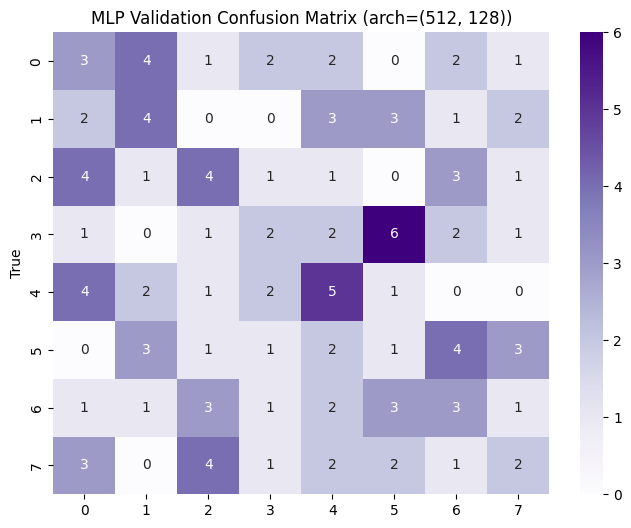

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Validation accuracy:", f"{val_scores[best_idx]:.4f}")
# validation confusion matrix (best model)
val_preds = best_mlp.predict(X_val)
cm_val = confusion_matrix(y_val, val_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, cmap="Purples", fmt="d")
plt.title(f"MLP Validation Confusion Matrix (arch={best_arch})")
plt.ylabel("True")
plt.show()

### 6.4.3 Test Results



Test accuracy: 0.3000


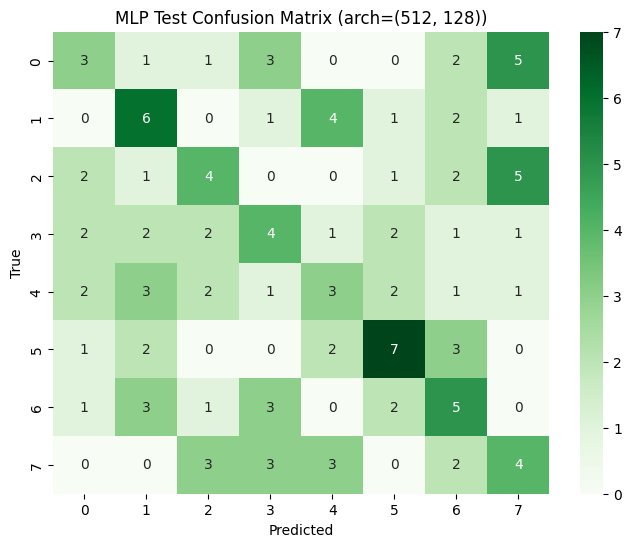


Saved best MLP model.


In [132]:
import joblib

test_preds = best_mlp.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("\nTest accuracy:", f"{test_acc:.4f}")

# test confusion matrix
cm_test = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Greens", fmt="d")
plt.title(f"MLP Test Confusion Matrix (arch={best_arch})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# saving best model
joblib.dump(best_mlp, "../models/mlp_model.joblib")
print("\nSaved best MLP model.")


### 6.4.4 Discussion

The MLP model achieved higher performance than both Logistic Regression and kNN, indication that a non-linear model is better suited to the MFCC feature space. Across the tested architectures, which were the hyper parameters tested on the validation set, the best architecture found was (512,128). This should that smaller networks were not expressive enough in capturing the non linear relationshis present in the feature vectors.

Validation accuracy of 0.2 is not high, but the test accuracy of 0.3 represents the highers performance so far and the model learned representation generalisation better than previous ones. The gap between validation and test accuracy is small, indication the model is not severely overfitting. 

The validation and test matricies show that certain classes are recognised more consistently, however many still show cross confusion, just like in previous two models. 

The overall pattern suggests that the MLP benefits from the richer non linear modeling capacity but is still constrained by the compressed MFCC representation. This reinforces the idea that models using 2D spectrograms will be able to extract more discriminative patterns. 

## 6.5 Convolutional Neural Network (CNN)
### 6.5.1 Training & Validation Results


In [185]:
import numpy as np
import os

# deep learning imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Flatten, Dense
)
from tensorflow.keras.utils import to_categorical


from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# load Dataset B
X_train_spec = np.load("../data/processed/X_train_spec.npy")
X_val_spec   = np.load("../data/processed/X_val_spec.npy")
X_test_spec  = np.load("../data/processed/X_test_spec.npy")

y_train = np.load("../data/processed/y_train.npy")
y_val   = np.load("../data/processed/y_val.npy")
y_test  = np.load("../data/processed/y_test.npy")

if X_train_spec.ndim == 3:
    X_train_spec = X_train_spec[..., np.newaxis]
    X_val_spec   = X_val_spec[..., np.newaxis]
    X_test_spec  = X_test_spec[..., np.newaxis]

# reshape for CNN input
input_shape = X_train_spec.shape[1:]
num_classes = len(np.unique(y_train))

# one-hot encoding of labels
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat   = to_categorical(y_val, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)



cnn_model = Sequential([
    Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=input_shape),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(32, (5, 5), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(32, (3, 3), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (5, 5), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (5, 5), activation="relu", padding="same"), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    Conv2D(128, (2, 2), activation="relu", padding="same"), 
    
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax"),
])

cnn_model.summary()

learning_rates = [0.0005, 0.001, 0.05]
results = {}

for lr in learning_rates:
    print(f"\nTraining CNN with learning rate = {lr}")

    cnn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = cnn_model.fit(
        X_train_spec, y_train_cat,
        validation_data=(X_val_spec, y_val_cat),
        epochs=50,
        batch_size=16,
        verbose=1
    )

    val_preds = np.argmax(cnn_model.predict(X_val_spec), axis=1)
    val_acc = accuracy_score(y_val, val_preds)

    print(f"Validation accuracy (lr={lr}): {val_acc:.4f}")
    results[lr] = val_acc


print("\nLearning Rate Comparison:")
for lr, acc in results.items():
    print(f"  LR = {lr}:  Validation Accuracy = {acc:.4f}")



Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_250 (Conv2D)             │ (None, 64, 313, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_232               │ (None, 32, 156, 16)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_230         │ (None, 32, 156, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_251 (Conv2D)             │ (None, 32, 156, 32)    │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_233               │ (None, 16, 78, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_231         │ (None, 16, 78, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_252 (Conv2D)             │ (None, 16, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_234               │ (None, 8, 39, 32)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_232         │ (None, 8, 39, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_253 (Conv2D)             │ (None, 8, 39, 64)      │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_235               │ (None, 4, 19, 64)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_233         │ (None, 4, 19, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_254 (Conv2D)             │ (None, 4, 19, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_236               │ (None, 2, 9, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_234         │ (None, 2, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_255 (Conv2D)             │ (None, 2, 9, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_256 (Conv2D)             │ (None, 2, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_257 (Conv2D)             │ (None, 2, 9, 128)      │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_237               │ (None, 1, 4, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 606,216 (2.31 MB)

 Trainable params: 605,544 (2.31 MB)

 Non-trainable params: 672 (2.62 KB)


Training CNN with learning rate = 0.0005
Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.1482 - loss: 2.1671 - val_accuracy: 0.1333 - val_loss: 2.0793
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.2321 - loss: 1.9712 - val_accuracy: 0.1250 - val_loss: 2.0813
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3375 - loss: 1.7743 - val_accuracy: 0.1167 - val_loss: 2.0781
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4357 - loss: 1.6138 - val_accuracy: 0.1583 - val_loss: 2.0761
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4982 - loss: 1.4192 - val_accuracy: 0.1667 - val_loss: 2.0609
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6143 - loss: 1.1874 - val_accuracy: 0.1917 - val_loss: 2.0492
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6464 - loss: 1.0318 - val_accuracy: 0.2500 - val_loss: 1.9537
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7071

### 6.5.3 Test Results


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_282 (Conv2D)             │ (None, 64, 313, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_256               │ (None, 32, 156, 16)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_254         │ (None, 32, 156, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_283 (Conv2D)             │ (None, 32, 156, 32)    │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_257               │ (None, 16, 78, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_255         │ (None, 16, 78, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_284 (Conv2D)             │ (None, 16, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_258               │ (None, 8, 39, 32)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_256         │ (None, 8, 39, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_285 (Conv2D)             │ (None, 8, 39, 64)      │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_259               │ (None, 4, 19, 64)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_257         │ (None, 4, 19, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_286 (Conv2D)             │ (None, 4, 19, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_260               │ (None, 2, 9, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_258         │ (None, 2, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_287 (Conv2D)             │ (None, 2, 9, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_288 (Conv2D)             │ (None, 2, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_289 (Conv2D)             │ (None, 2, 9, 128)      │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_261               │ (None, 1, 4, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 606,216 (2.31 MB)

 Trainable params: 605,544 (2.31 MB)

 Non-trainable params: 672 (2.62 KB)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.1786 - loss: 2.1332 - val_accuracy: 0.1167 - val_loss: 2.0798
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.2732 - loss: 1.9241 - val_accuracy: 0.1333 - val_loss: 2.0748
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3625 - loss: 1.7238 - val_accuracy: 0.1250 - val_loss: 2.0758
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4571 - loss: 1.5483 - val_accuracy: 0.1583 - val_loss: 2.0642
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5071 - loss: 1.3295 - val_accuracy: 0.2250 - val_loss: 2.0444
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6214 - loss: 1.1343 - val_accuracy: 0.1667 - val_loss: 2.0386
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7071 - loss: 0.8923 - val_accuracy: 0.2250 - val_loss: 1.9736
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7964 - loss: 0.6553 - val_accuracy: 0.2417 - v

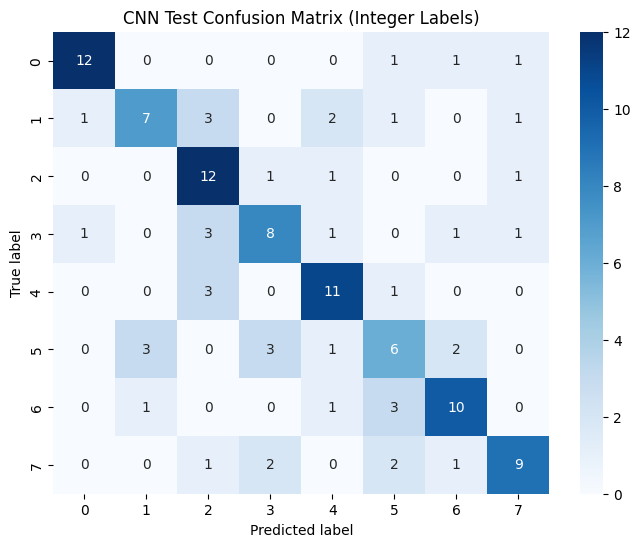

Saved best CNN model to models/cnn_model.h5


In [189]:
cnn_model_f = Sequential([
    Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=input_shape),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(32, (5, 5), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(32, (3, 3), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (5, 5), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (5, 5), activation="relu", padding="same"), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    Conv2D(128, (2, 2), activation="relu", padding="same"), 
    
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax"),
])

cnn_model_f.summary()



cnn_model_f.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = cnn_model_f.fit(
    X_train_spec, y_train_cat,
    validation_data=(X_val_spec, y_val_cat),
    epochs=50,
    batch_size=16,
    verbose=1
)

test_probs = cnn_model_f.predict(X_test_spec)
test_preds = np.argmax(test_probs, axis=1)
test_acc = accuracy_score(y_test, test_preds)
print(f"Test accuracy (CNN): {test_acc:.4f}")

cm = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CNN Test Confusion Matrix (Integer Labels)")
plt.show()

# Save best CNN model
cnn_model_f.save("../models/cnn_model.h5")
print("Saved best CNN model to models/cnn_model.h5")

### 6.5.4 Discussion
The CNN model is the first one that achieves maningful performance, outperforming all classical methods significantly. Tuning of the learning rate on the same architecture shows a very strong sensitivity to the optimiser step size, which learning rate 0.0005 producing the best results on validation set (60%), learning rate 0.001 is second best with (55%) followed by learning rate of 0.05 which collapses accuracy to 12.5%. equivalent to guessing a class. The large step size causes the optimiser to overshoot, preventing meaningful learning.  

0.0005 learning rate generalises much better, suggesting a slower and more controlled updates allow the network to learn more time-frequency patters of the input spectogram. 

Training a final model with lr = 0.0005 yields:

- Validation accuracy: 0.6083
- Test accuracy: 0.6250

The closesness in values of validaiton and test performance suggests that the model is not overfitting to the validation set and is qenuinely learning meaningful features that generalise well to unseen data. This shows that CNNs are well suited for 2D time-frequency representations: the convolutional layers can extract local melodic contours, frequency transitions and stable harmonic shapes that MFCC-based vector models cannot preserve.

The confusion matrix shows that the CNN distributes predictions more evenly across classes, with fewer dominant classes as seen in kNN and Logistic Regression. However, some confusion still exists between melodically similar songs, indicating that even spectrograms do not perfectly separate all eight labels.

Overall, the CNN clearly demonstrates the benefit of using richer 2D representations and hierarchical feature learning. Its performance (around 60%) confirms that deep models can extract musically meaningful structure from humming and whistling, whereas classical models are limited by compressed MFCC vectors and cannot capture the temporal–spectral patterns needed for this task.

# 7 Conclusions
## 7.1 Summary of findings
This mini project explored the problem of predicting the song title of 8 presented songs from humming and whistling recordings using a range of machine learning model families, in increasing complexity. The experiments showed a clear trend where classical models, those which relied on MFCC features performed poorly, whereas the final CNN model which works on mel-spectograms learned significantly more patterns. Overall, the CNN model was able to significantly outperformal all classical models, confirming that it is the better approach for audio data and this problem.

## 7.2 Classical models
The classical models investigated were Logistic Regression, k-Nearest Neighbours and Multilayer Perceptron, these were used as a baseline but their performance, even with parameter tuning, was still limited:
- Logistic Regression reached a test accuracy of ~23%, confirming that linear boundaries are insufficient in the MFCC feature space. 
- kNN improved slightly, and with its best hyperparameter k=11, it reached a test accuracy of ~22%. It sufferered from high-dimensional noise collapsing useful information for learning. Distances in the feature space were not meaningful enough to capture melodic patters and similarity. 
- MLP reached the highest classical model accuracy on the testing set of ~30%, demonstrating the benefit of non-linear decision boundaries. Yet the model still remained constrained by the feature space. 

Overall, it was found that all classical methods were limited by the loss of structure and high overlap between classes in MFCC feature space, confirming the difficulty of the task and the need for more expressive architectures and feature extraction. 
## 7.3 CNN performance
The Convolutional Neural Network achieved substantially better results:
- Best validation accuracy: ~60%
- Final testing accuracucy: ~62.5%

This shows that retraining the full mel-spectogram enables the network to learn time-frequency patters, countrous of pitch, shapes of harmonies and rhythmic structure of the songs. MFCC averaging removed all these features for classical models. 

The accuracy jump from ~30% (MLP) to ~63% (CNN) clearly shows that representation quality is the dominant factor that affected the model performance in this task.

Tuning of learning rate hyperparameter on the validation data also showed strong influence, with learning rate 0.0005 yielding the best generalisation. The CNN results align with expectations of audio classification tasks using limited data. 

## 7.4 Limitations
Despite the strong imporvement, several crucial limitations remain:
- Small dataset size with only 100 samples for each class will limit the generalisation for any deep models. 
- High variability in the data, inconsistencies in rhythm, differences in recording devices (even though same software was used).
- Information loss due to trimming or padding of all audio to a dixed duration. 
- MFCC averaging, which was used by classical models, discards nerarly all of time strucutre, especially visiable in the plotting of the MFCC feature space above. 
- No data augementation reduced robustness to noise. 
- CNN architecture tuning was manual.

Even with improvements achieved by CNN, the limitations of the dataset and methodolofy will still impose performance ceilings. 800 sample dataset is small for a deep-learning task involving noise, high-variablity data, making it difficult for models to learn representations. Trimming and padding clips to a fixed duration inevitably removes some melodic information, especially for songs that start late or have inconsistent or wrong pacing. For classical models, collapsing MFCC to a mean vector discards almost all temmporal strucure, removing important patterns that distinguish melodies. Additionally, the absense of any data augementation means the mdels never see noisy version of the aduio, which would make them more robus. The tuning of the CNN was done manually, and a more systematic search could create a better pefrorming model, that generalises better. 

## 7.5 Improvements 
Several improvements below could increase the performance further:

Feature improvements:
- Using full MFCC sequence instead of averaging over a interval of time, much more higly dimensional though. 
- Increasing mel-spectogram resoltution or log-mel featuers. 

Model improvements: 
- 1D CNNs on raw waveforms, 
- CRNNs to model termporal evolution.
- Transformer based models. 

Data improvements:
- Augmentation: pitch shift, time stretch, Gaussian noise, harmonic distortion.
- Increase dataset size

While the current pipelines provide a solid abseline and attempt at this task, there is clear room for further enhancement across features, models and data. Richer representations such as full MFCC sequence or higher-resolution spectograms would preserve more temporal and harmonic structure, giving models stronger melodic patterns. More advanced architectures could learn deeper patterns beyond what MFFcs provide. Finally, the most impactful improvement would likely come from the data side, applying augmentation, or collection additional recording would greatly increase robustness and model performance, giving the models more data to work with. 


# 8 References

Acknowledge others here (books, papers, repositories, libraries, tools)